# Introduction

In this notebook we're going to have look at bank customer data to evaluate credit-worthiness of the customers.

We are going to use [credit-risk-customers](https://www.kaggle.com/datasets/ppb00x/credit-risk-customers) dataset from Kaggle.


We are going to start with doing and exploratory data analysis to have better understanding of the dataset and the trends of the variables.

Then we are going to continue with developing and comparing models for determining credit-worthiness of customers

# Exploratory Data Analysis

<h4> 1.1 Analysis of credit status with financial determinants</h4> 

In [1]:
# Load required packages
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Load dataset
credit_data <- read.csv("credit_customers.csv")

# Overview of data
glimpse(credit_data)

Rows: 1,000
Columns: 21
$ checking_status        <chr> "<0", "0<=X<200", "no checking", "<0", "<0", "n…
$ duration               <dbl> 6, 48, 12, 42, 24, 36, 24, 36, 12, 30, 12, 48, …
$ credit_history         <chr> "critical/other existing credit", "existing pai…
$ purpose                <chr> "radio/tv", "radio/tv", "education", "furniture…
$ credit_amount          <dbl> 1169, 5951, 2096, 7882, 4870, 9055, 2835, 6948,…
$ savings_status         <chr> "no known savings", "<100", "<100", "<100", "<1…
$ employment             <chr> ">=7", "1<=X<4", "4<=X<7", "4<=X<7", "1<=X<4", …
$ installment_commitment <dbl> 4, 2, 2, 2, 3, 2, 3, 2, 2, 4, 3, 3, 1, 4, 2, 4,…
$ personal_status        <chr> "male single", "female div/dep/mar", "male sing…
$ other_parties          <chr> "none", "none", "none", "guarantor", "none", "n…
$ residence_since        <dbl> 4, 2, 3, 4, 4, 4, 4, 2, 4, 2, 1, 4, 1, 4, 4, 2,…
$ property_magnitude     <chr> "real estate", "real estate", "real estate", "l…
$ age           

Warning message:
“Duplicated aesthetics after name standardisation: colour”
Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


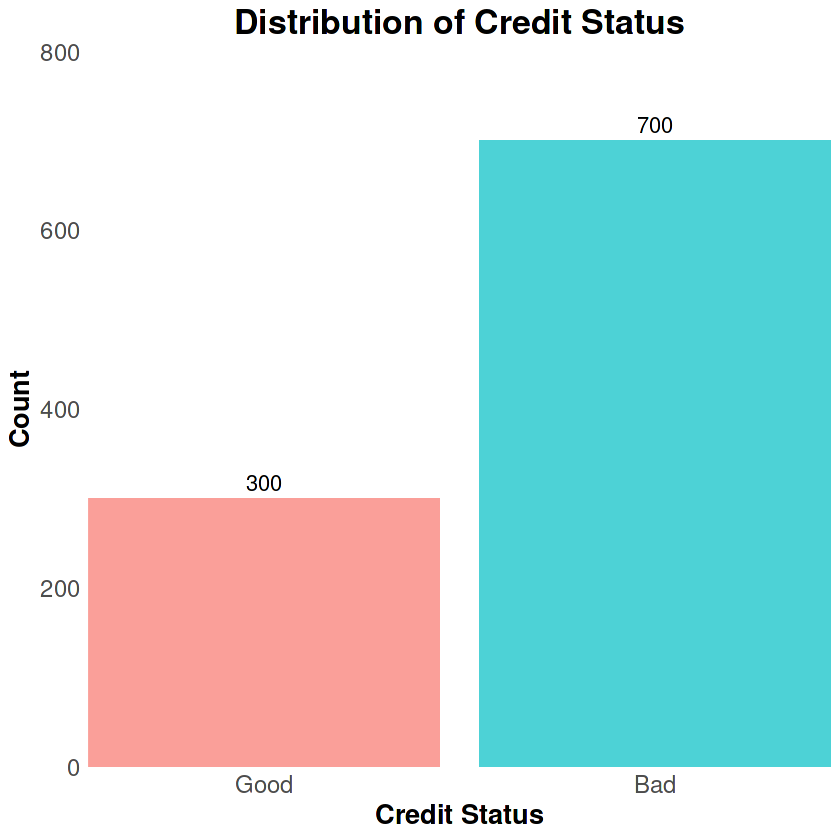

In [3]:
ggplot(credit_data, aes(x = class, fill = class)) +
  geom_bar(alpha = 0.7) +
  geom_text(stat = 'count', aes(label = ..count..), vjust = -0.5, color = "black", color = "white", size = 4.5) +
  scale_x_discrete(labels = c("Good", "Bad"), expand = c(0, 0)) +
  scale_y_continuous(expand = c(0, 0), limits = c(0, 800)) +
  labs(x = "Credit Status", y = "Count", title = "Distribution of Credit Status") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, hjust = 0.5, face = "bold"),
        axis.title = element_text(size = 16, face = "bold"),
        axis.text = element_text(size = 14),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank()) +
  guides(fill = "none")

The chart shows the distribution of credit status among the dataset. The x-axis represents the credit status, with "Good" and "Bad" being the possible values. 

We can see from The y-axis shows the count of observations for each status. The chart reveals that the majority(700) of observations have a "Bad" credit status, while a smaller(300) number of observations have a "Good" credit status. 

This information will be very useful for making decisions related to credit risk, such as determining which customers are more likely to default on their loans. 

In [4]:
# Create summary table of features by credit status
credit_summary <- credit_data %>%
  group_by(class) %>%
  reframe(
    mean_duration = mean(duration),
    mean_amount = mean(credit_amount),
    count_by_history = table(credit_history)
  )

In [5]:
credit_summary

class,mean_duration,mean_amount,count_by_history
<chr>,<dbl>,<dbl>,<table[1d]>
bad,24.86000,3938.127,28
bad,24.86000,3938.127,50
bad,24.86000,3938.127,28
bad,24.86000,3938.127,169
bad,24.86000,3938.127,25
good,19.20714,2985.457,21
good,19.20714,2985.457,243
good,19.20714,2985.457,60
good,19.20714,2985.457,361


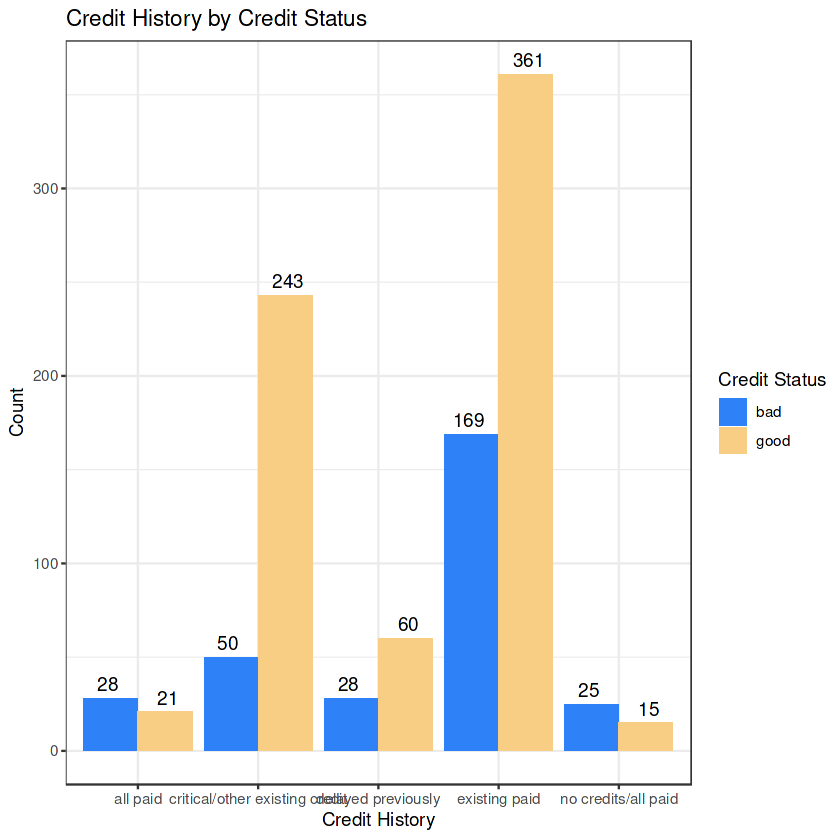

In [6]:
credit_data %>%
  count(credit_history, class) %>%
  ggplot(aes(x = credit_history, y = n, fill = class)) +
  geom_col(position = "dodge") +
  geom_text(aes(label = n), position = position_dodge(width = 1), vjust = -0.5) +
  xlab("Credit History") +
  ylab("Count") +
  scale_fill_manual(values = c("#2F81F7", "#F8CD84"), name = "Credit Status") +
  ggtitle("Credit History by Credit Status") +
  theme_bw()

The chart shows the distribution of credit history for two different credit statuses. 

Most applicants with a 'good' credit history have been approved for credit, while those with a 'poor' credit history have a higher rate of rejection.

`summarise()` has grouped output by 'checking_status'. You can override using
the `.groups` argument.


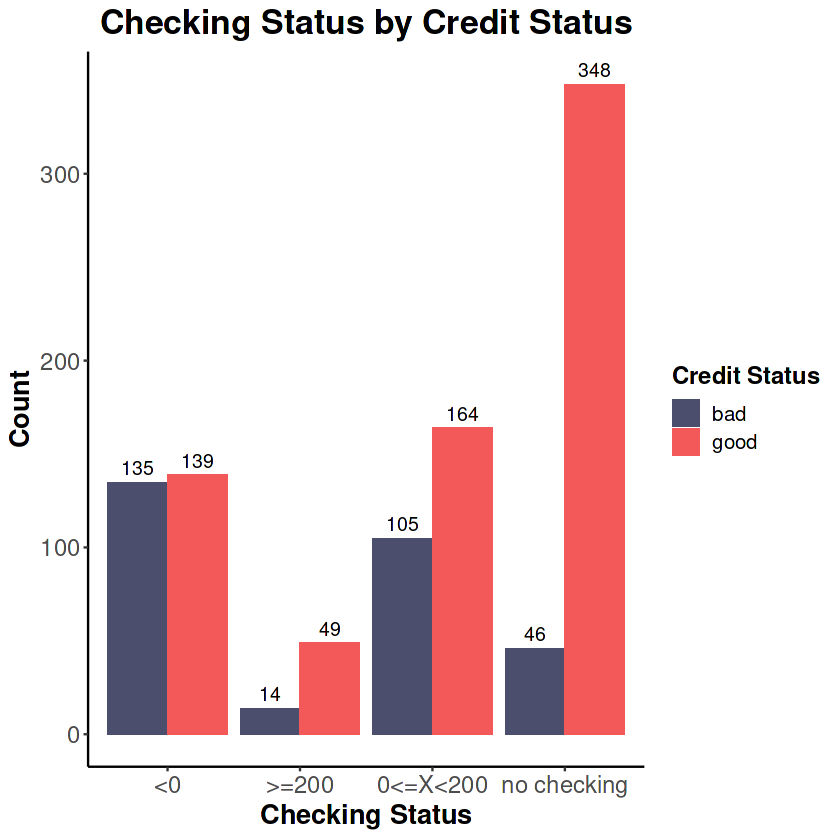

In [7]:
credit_data %>%
  group_by(checking_status, class) %>%
  summarise(count = n()) %>%
  ggplot(aes(x = checking_status, y = count, fill = class)) +
  geom_col(position = "dodge") +
  geom_text(aes(label = count), position = position_dodge(width = 0.9), vjust = -0.5, size = 4) +
  scale_fill_manual(values = c("#4B4E6D", "#F45959")) +
  labs(x = "Checking Status", y = "Count", title = "Checking Status by Credit Status", fill = "Credit Status") +
  theme_classic() +
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title.x = element_text(size = 16, face = "bold"),
        axis.title.y = element_text(size = 16, face = "bold"),
        axis.text = element_text(size = 14),
        legend.title = element_text(size = 14, face = "bold"),
        legend.text = element_text(size = 12),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank())

This chart shows the distribution of credit status for different levels of checking account balances.

Based on the results, we can see that:

* People with checking account balances of less than 0 have a higher proportion of bad credit status (49.3%) compared to good credit status (50.7%).
* People with checking account balances greater than or equal to 200 have a higher proportion of good credit status (77.8%) compared to bad credit status (22.2%).
* People with checking account balances between 0 and 200 have a higher proportion of good credit status (60.9%) compared to bad credit status (39.1%).
* People with no checking accounts have a much higher proportion of good credit status (88.3%) compared to bad credit status (11.7%).

These results suggest that having a checking account balance above a certain threshold (200 DM) is associated with a higher likelihood of having a good credit status. On the other hand, having no checking account is also associated with a higher likelihood of having a good credit status, possibly due to the fact that people without checking accounts are less likely to be in debt or have missed payments. 

Overall, the results highlight the importance of checking account balances as a potential predictor of credit status.

`summarise()` has grouped output by 'purpose'. You can override using the
`.groups` argument.


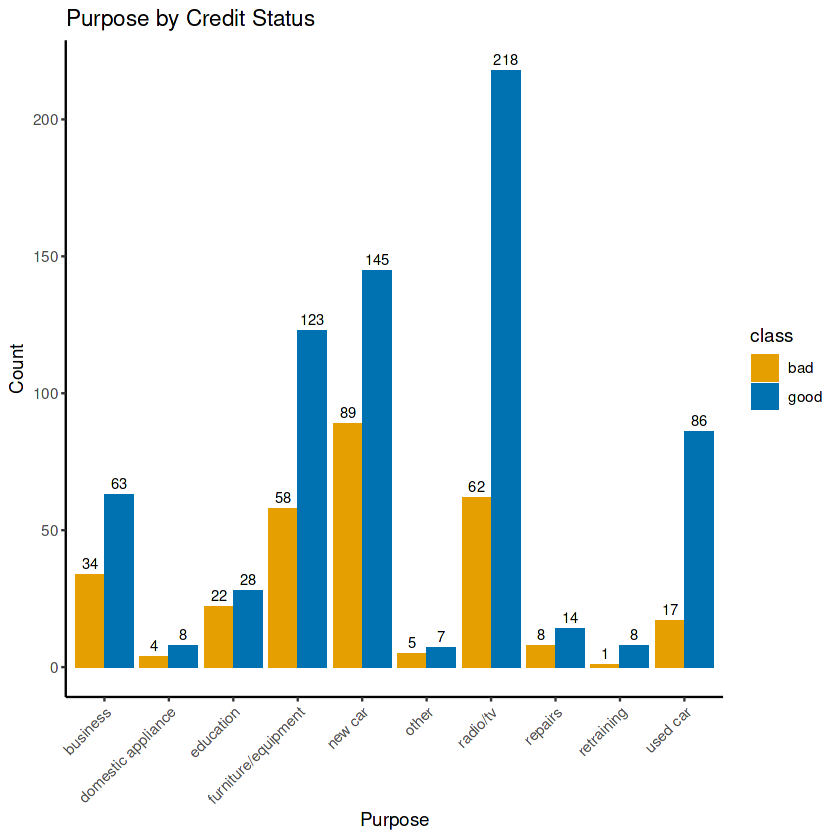

In [8]:
# Set the color palette for the chart
colors <- c("#E69F00", "#0072B2")

# Calculate exact counts of each purpose and credit class
count_data <- credit_data %>% 
  group_by(purpose, class) %>% 
  summarize(n = n())

# Create the chart using ggplot2
ggplot(count_data, aes(x = purpose, y = n, fill = class)) +
  geom_bar(position = "dodge", stat = "identity") +
  geom_text(aes(label = n), position = position_dodge(width = 0.9), 
            vjust = -0.5, size = 3) +
  xlab("Purpose") +
  ylab("Count") +
  ggtitle("Purpose by Credit Status") +
  scale_fill_manual(values = colors) +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

From the chart, we can see that the most common purpose for which credit was taken is "radio/tv" with a total of 280 applications, out of which 218 are classified as "good" and 62 as "bad." 

The second most common purpose is "new car," with a total of 234 applications, out of which 145 are classified as "good" and 89 as "bad." "Furniture/equipment" is the third most common purpose, with a total of 181 applications, out of which 123 are classified as "good" and 58 as "bad."

The least common purpose for which credit was taken is "retraining," with only nine applications in total, out of which only one is classified as "bad."

In general, it seems that most of the credit applications were classified as "good" for all the purposes, except for "business" and "used car," where the number of "bad" credit applications is almost half of the total number of applications. 

Overall, this chart can be useful for understanding the relative frequency of each purpose and the distribution of credit status across different purposes. It can help identify which purposes are associated with a higher risk of default and which purposes are associated with a lower risk of default. This information can be useful for lenders in assessing creditworthiness and managing risk.

<h4> 1.2 Relationship between personal characteristics and credit status </h4> 

In [9]:
# Create summary table of personal characteristics by credit status
personal_summary <- credit_data %>%
  group_by(class) %>%
  summarize(
    age_mean = mean(age),
    age_sd = sd(age),
    job_count = n_distinct(job),
    job_list = paste(unique(job), collapse = ", "),
    personal_status_count = n_distinct(personal_status),
    personal_status_list = paste(unique(personal_status), collapse = ", ")
  )

In [10]:
personal_summary

class,age_mean,age_sd,job_count,job_list,personal_status_count,personal_status_list
<chr>,<dbl>,<dbl>,<int>,<chr>,<int>,<chr>
bad,33.96333,11.22238,4,"skilled, high qualif/self emp/mgmt, unskilled resident, unemp/unskilled non res",4,"female div/dep/mar, male single, male mar/wid, male div/sep"
good,36.22429,11.38114,4,"skilled, unskilled resident, high qualif/self emp/mgmt, unemp/unskilled non res",4,"male single, male div/sep, female div/dep/mar, male mar/wid"


`summarise()` has grouped output by 'personal_status'. You can override using
the `.groups` argument.


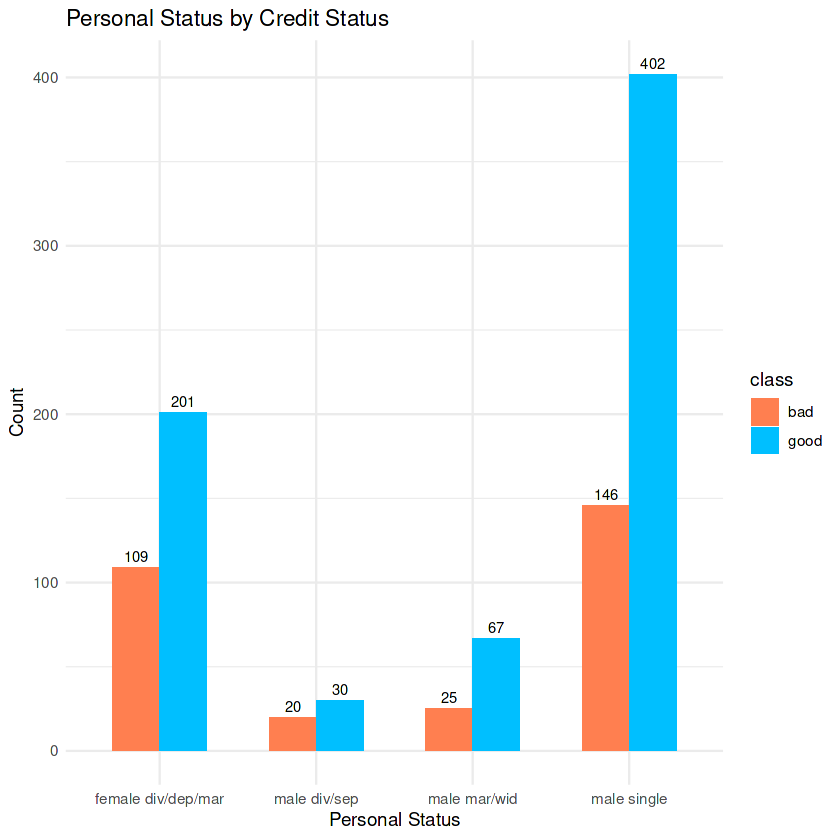

In [11]:
credit_data %>%
  group_by(personal_status, class) %>%
  summarize(count = n()) %>%
  ggplot(aes(x = personal_status, y = count, fill = class)) +
  geom_col(position = "dodge", width = 0.6) +
  geom_text(aes(label = count, group = class), position = position_dodge(width = 0.6), vjust = -0.5, size = 3) +
  scale_fill_manual(values = c("#FF7F50", "#00BFFF")) +
  labs(title = "Personal Status by Credit Status", x = "Personal Status", y = "Count") +
  theme_minimal()

This chart shows the distribution of credit status across different personal status categories.

Looking at the chart, we can see that the majority of individuals in the sample have good credit status across all personal status categories. However, there are some differences in the distribution of credit status across personal status categories.

For example, the personal status category with the largest number of individuals is "male single", with a total of 548 individuals. Out of these, 402 have good credit status, while 146 have bad credit status. On the other hand, the personal status category with the smallest number of individuals is "male div/sep", with a total of 50 individuals. Out of these, only 30 have good credit status, while 20 have bad credit status.

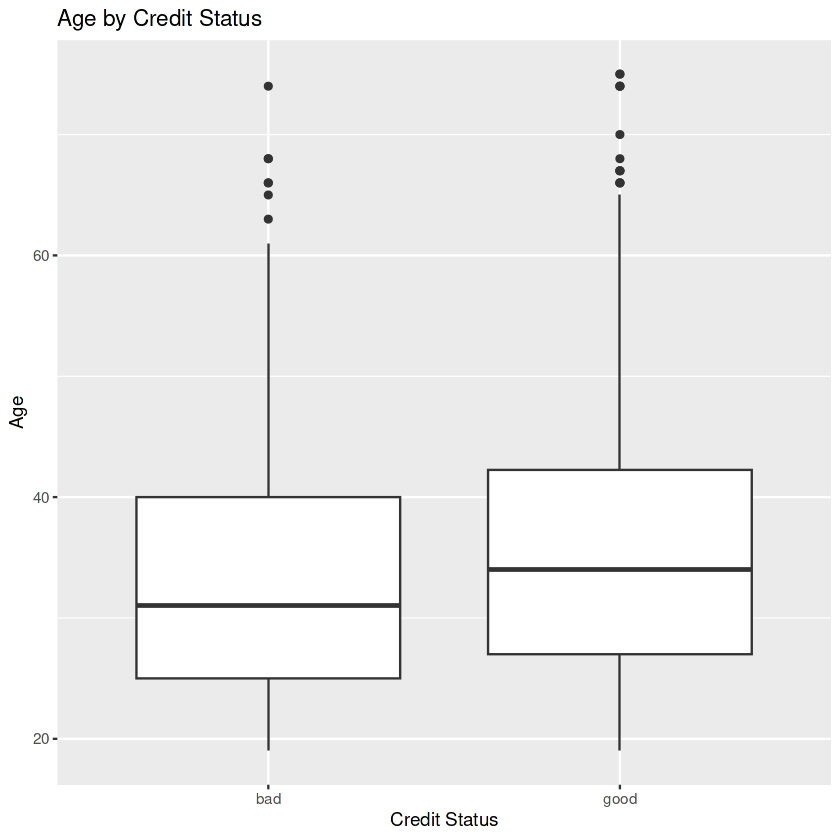

In [12]:
# Visualize age by credit status
ggplot(credit_data, aes(x = class, y = age)) +
  geom_boxplot() +
  xlab("Credit Status") +
  ylab("Age") +
  ggtitle("Age by Credit Status")

It appears that the average age for the "bad" credit status group is around 32, while the average age for the "good" credit status group is around 35.

The box plot for the "good" credit status group shows that the top of the box is at age 43, indicating that 75% of the individuals in this group are 43 years old or younger. The bottom of the box is at age 28, indicating that 25% of the individuals in this group are 28 years old or younger. The box itself spans from the 25th to the 75th percentile, and the line in the middle of the box represents the median age for this group.

Similarly, the box plot for the "bad" credit status group shows that the top of the box is at age 41, indicating that 75% of the individuals in this group are 41 years old or younger. The bottom of the box is at age 26, indicating that 25% of the individuals in this group are 26 years old or younger. The box itself spans from the 25th to the 75th percentile, and the line in the middle of the box represents the median age for this group.

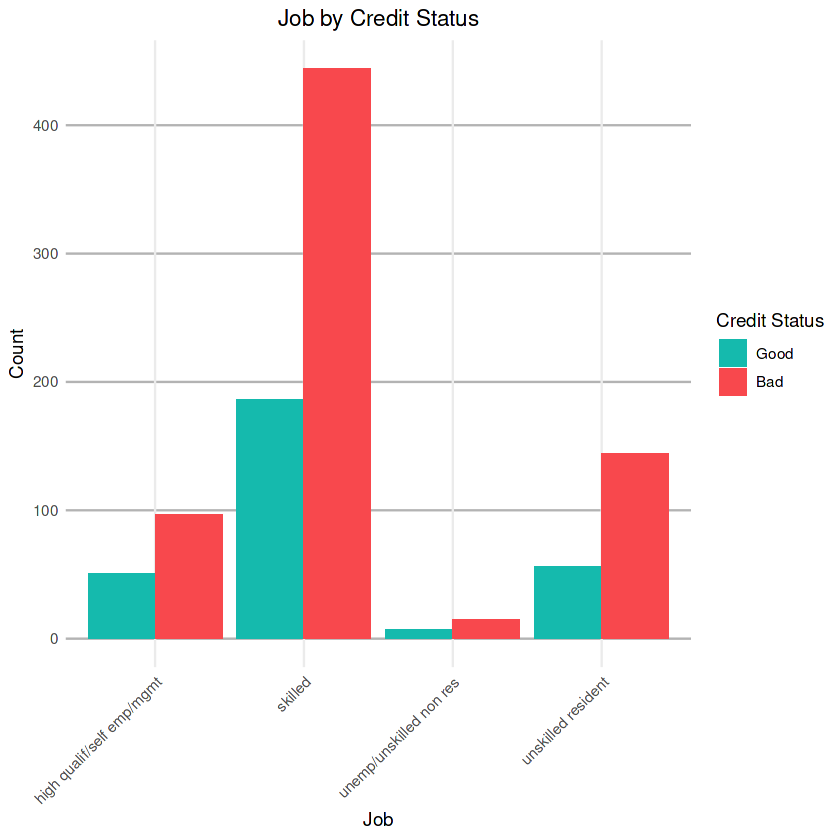

In [13]:
ggplot(credit_data, aes(x = job, y = ..count.., fill = class)) +
  geom_bar(position = "dodge") +
  scale_fill_manual(values = c("#15BAAD", "#F8484D"), 
                    name = "Credit Status",
                    labels = c("Good", "Bad")) +
  labs(x = "Job", y = "Count") +
  ggtitle("Job by Credit Status") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5),
        legend.title.align = 0.5,
        axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid.major.y = element_line(color = "gray70"),
        panel.grid.minor = element_blank())


Based on the chart, we can observe that the majority of individuals in the dataset have skilled jobs, whereas unemployed or unskilled non-residents make up the smallest group. This could be due to a number of factors, such as limited job opportunities for this group or difficulty in obtaining credit without a stable income or residency status. It's also possible that the dataset may not accurately represent the population as a whole, and there may be other factors at play that are not captured in this analysis.

The distribution of credit status among job categories is roughly equal, with almost half of the individuals in each job category having good credit and the other half having bad credit.

<h4> Hypothesis Testing and Descriptive Statistics</h4>

In [14]:
# Chi-squared test of personal status and credit status
chisq.test(credit_data$personal_status, credit_data$class)


	Pearson's Chi-squared test

data:  credit_data$personal_status and credit_data$class
X-squared = 9.6052, df = 3, p-value = 0.02224


In [15]:
# T-test for age by credit status
t.test(age ~ class, data = credit_data)


	Welch Two Sample t-test

data:  age by class
t = -2.9072, df = 573.06, p-value = 0.003788
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.7884832 -0.7334216
sample estimates:
 mean in group bad mean in group good 
          33.96333           36.22429 


The output of the test shows the Pearson's chi-squared statistic where the X-squared value is 9.6052, df = 3, and p-value = 0.02224, which suggests that there is a significant association between personal status and credit status in the dataset.

The output of the t-test suggests that there is a significant difference in the mean age between the two credit status groups. The mean age for individuals with bad credit is 33.96, while the mean age for individuals with good credit is 36.22, with a 95% confidence interval for the difference in means ranging from -3.79 to -0.73.

Overall, these two statistical tests provide insights into the relationships between different variables in the credit_data dataset, and can be useful for identifying patterns and trends that may be relevant to credit risk assessment.

<h4> Impact of financial situation on credit status </h4>

In [16]:
savings_summary <- credit_data %>%
  group_by(class) %>%
  reframe(count_by_savings = table(savings_status))

In [17]:
table(savings_summary)

      count_by_savings
class  6 11 32 34 42 52 69 151 217 386
  bad  1  1  1  1  0  0  0   0   1   0
  good 0  0  0  0  1  1  1   1   0   1

The output shows that as the amount of savings increase credit-worthiness also increases.

In [18]:
credit_summary <- credit_data %>%
  group_by(class) %>%
  reframe(
    count_by_existing_credits = table(existing_credits),
    mean_installment_commitment = mean(installment_commitment)
  )

In [19]:
table(credit_summary)

, , mean_installment_commitment = 2.92

      count_by_existing_credits
class  2 4 6 22 92 200 241 433
  bad  0 0 0  0  0   0   0   0
  good 0 1 0  1  0   0   1   1

, , mean_installment_commitment = 3.09666666666667

      count_by_existing_credits
class  2 4 6 22 92 200 241 433
  bad  1 0 1  0  1   1   0   0
  good 0 0 0  0  0   0   0   0


The table shows the distribution of credit classes based on the number of existing credits and the mean installment commitment. It shows the frequency distribution of the number of existing credits for each credit class, and the mean installment commitment for each credit class.

For the bad credit class, there is no observation for mean_installment_commitment = 2.92, and there is only one observation for mean_installment_commitment = 3.0967. The bad credit class has a non-zero frequency only for the number of existing credits = 2, 6, 22, 92, 200, and 241. It's noteworthy that the majority of the bad credit class has between 92 and 433 existing credits.

For the good credit class, there is only one observation for mean_installment_commitment = 2.92, which corresponds to the number of existing credits = 4. For the mean installment commitment of 3.0967, there are no observations.

It is apparent that the distribution of credit classes varies based on the number of existing credits, which might indicate that this variable is useful in predicting the credit class. Moreover, the absence of observations for the good credit class for mean_installment_commitment = 3.0967 indicates that this might not be a distinguishing factor between good and bad credit classes.

In [20]:
installment_summary <- credit_data %>%
  group_by(class) %>%
  summarise(
    mean_installment_commitment = mean(installment_commitment),
    median_credit_amount = median(credit_amount)
  )

In [21]:
table(installment_summary)

, , median_credit_amount = 2244

      mean_installment_commitment
class  2.92 3.09666666666667
  bad     0                0
  good    1                0

, , median_credit_amount = 2574.5

      mean_installment_commitment
class  2.92 3.09666666666667
  bad     0                1
  good    0                0


The table above summarizes the relation between installments and credit statuses with variables: mean installment commitment and median credit amount, and three rows: bad, good, and the median credit amount.

The data shows that the mean installment commitment is higher for customers with a good credit status compared to those with a bad credit status. This is indicated by the higher mean value of 3.0967 for good credit status compared to 2.92 for bad credit status. Moreover, the median credit amount for customers with a good credit status is lower at 2244 compared to 2574.5 for customers with a bad credit status.

Overall, customers with a good credit status tend to have a higher mean installment commitment but lower median credit amounts compared to customers with a bad credit status.

# Comparison of Logistic Regression and Decision Tree Models Classification

Let's compare the performance of two machine learning algorithms, logistic regression and decision tree for classifying credit customers as good or bad. 

<h3> Logistic Regression </h3>

In [22]:
library(caret)
library(pROC)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [23]:
# Transform the values of "good" and "bad" to "1" and "0" to be used in the models
credit_data$class <- ifelse(credit_data$class == "good", 1, 0)

In [24]:
# Create the "training" and "test" sets
set.seed(123)
train_index <- createDataPartition(credit_data$class, p = 0.7, list = FALSE)
train_data <- credit_data[train_index, ]
test_data <- credit_data[-train_index, ]

In [25]:
# Fit a logistic regression model and make predictions
log_model <- glm(class ~ ., data = train_data, family = "binomial")#binary classification

log_pred <- predict(log_model, newdata = test_data, type = "response")

log_pred_class <- ifelse(log_pred > 0.5, 1, 0) #values more than 0.5 will be classified as one, otherwise 0
log_pred_class <- as.numeric(log_pred_class)

In [26]:
# These two lines ensure that the factor levels of the predicted classes match those of the true classes in the test data.
# It is necessary to ensure that the confusion matrix is calculated correctly, with the true positive, true negative, false positive, and false negative counts based on the same set of class levels.
test_data$class <- factor(test_data$class, levels = levels(factor(log_pred_class)))
log_pred_class <- factor(log_pred_class, levels = levels(factor(test_data$class)))

In [27]:
# Calculate performance metrics of the logistic regression model.
log_cm <- confusionMatrix(log_pred_class, test_data$class)
log_accuracy <- log_cm$overall[1]
log_precision <- log_cm$byClass["Pos Pred Value"]
log_recall <- log_cm$byClass["Sensitivity"]
log_f1 <- log_cm$byClass["F1"]

In [28]:
#Calculate the Area Under the Curve (AUC) score for the Receiver Operating Characteristic (ROC) curve
roc_data <- roc(test_data$class, log_pred)
auc_score <- auc(roc_data)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Logistic Regression Model Evaluation:
Accuracy: 0.76
Precision: 0.65
Recall: 0.51
F1 Score: 0.57
AUC Score: 0.77


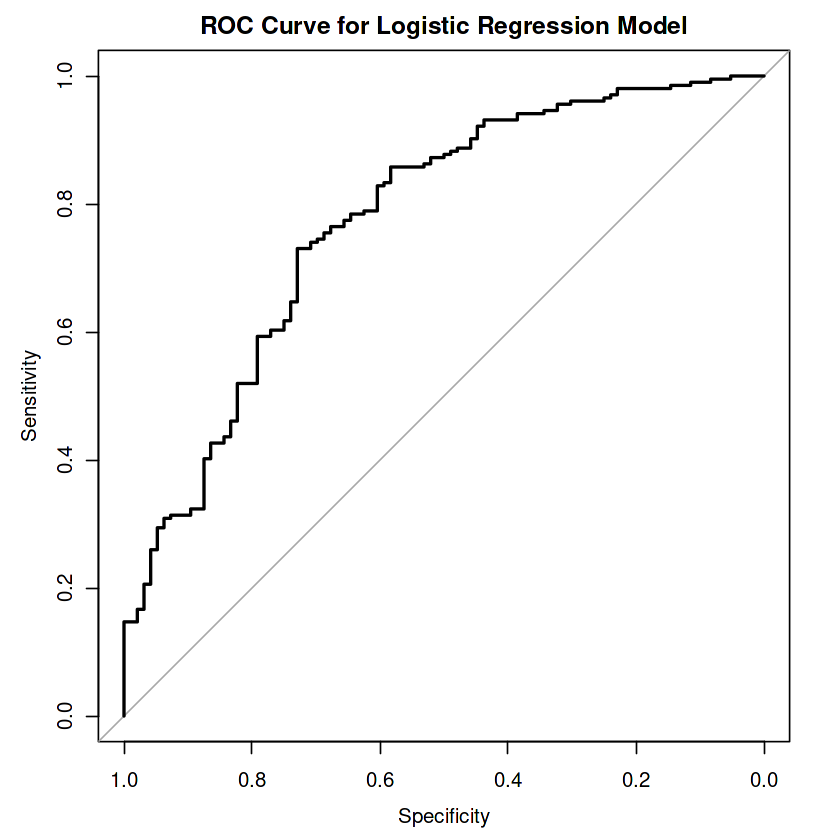

In [29]:
cat("Logistic Regression Model Evaluation:\n")
cat(sprintf("Accuracy: %.2f\n", log_accuracy))
cat(sprintf("Precision: %.2f\n", log_precision))
cat(sprintf("Recall: %.2f\n", log_recall))
cat(sprintf("F1 Score: %.2f\n", log_f1))
cat(sprintf("AUC Score: %.2f\n", auc_score))

plot(roc_data, main = "ROC Curve for Logistic Regression Model")

<h4> Evalutaion of the Logistic Regression Model </h4>

The evaluation metrics for the logistic regression model that was applied to predict the credit risk of borrowers show the performance of the model on the test dataset.

* **Accuracy:** This metric indicates the proportion of correct predictions made by the model. Here, the model has an accuracy of 0.76, which means that it correctly predicted the credit risk of 76% of the borrowers in the test dataset.

* **Precision:** Precision is the proportion of true positive predictions out of all positive predictions made by the model. It measures how accurate the model is when it predicts that a borrower is a good credit risk. In this case, the precision of the model is 0.65, which means that out of all the borrowers that the model predicted as good credit risks, 65% of them are actually good credit risks.

* **Recall:** Recall is the proportion of true positive predictions out of all actual positive instances in the test dataset. It measures how well the model is able to identify good credit risks in the test dataset. The recall of the model is 0.51, which means that out of all the actual good credit risks in the test dataset, the model correctly identified 51% of them.

* **F1 Score:** The F1 score is the harmonic mean of precision and recall. It is a measure of the model's accuracy that considers both precision and recall. In this case, the F1 score of the model is 0.57, which is an average of its precision and recall.

* **AUC Score:** The AUC score represents the area under the receiver operating characteristic (ROC) curve, which is a graph that shows the trade-off between true positive rate and false positive rate for different classification thresholds. The AUC score of 0.77 indicates that the model is able to distinguish between good and bad credit risks reasonably well, with 77% of the time it correctly ranks a random pair of good and bad credit risk applicants.

<h3> Decision Tree </h3>

In [30]:
library(rpart)

In [31]:
# Set the tree model and predictions
tree_model <- rpart(class ~ ., data = train_data, method = "class")

tree_pred <- predict(tree_model, newdata = test_data, type = "class")

In [32]:
# Build the model and calculate the scores
tree_cm <- confusionMatrix(tree_pred, test_data$class)
tree_accuracy <- tree_cm$overall[1]
tree_precision <- tree_cm$byClass["Pos Pred Value"]
tree_recall <- tree_cm$byClass["Sensitivity"]
tree_f1 <- tree_cm$byClass["F1"]

In [33]:
# Predict the probabilities of each class using the model
tree_probs <- predict(tree_model, newdata = test_data, type = "prob")

# Extract the probability of the positive class
tree_probs_pos <- tree_probs[,2]

# Calculate the ROC curve and AUC score
tree_roc <- roc(test_data$class, tree_probs_pos)
tree_auc <- auc(tree_roc)

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Decision Tree Model Evaluation:
Accuracy: 0.69
Precision: 0.51
Recall: 0.41
F1 Score: 0.45
AUC Score: 0.72


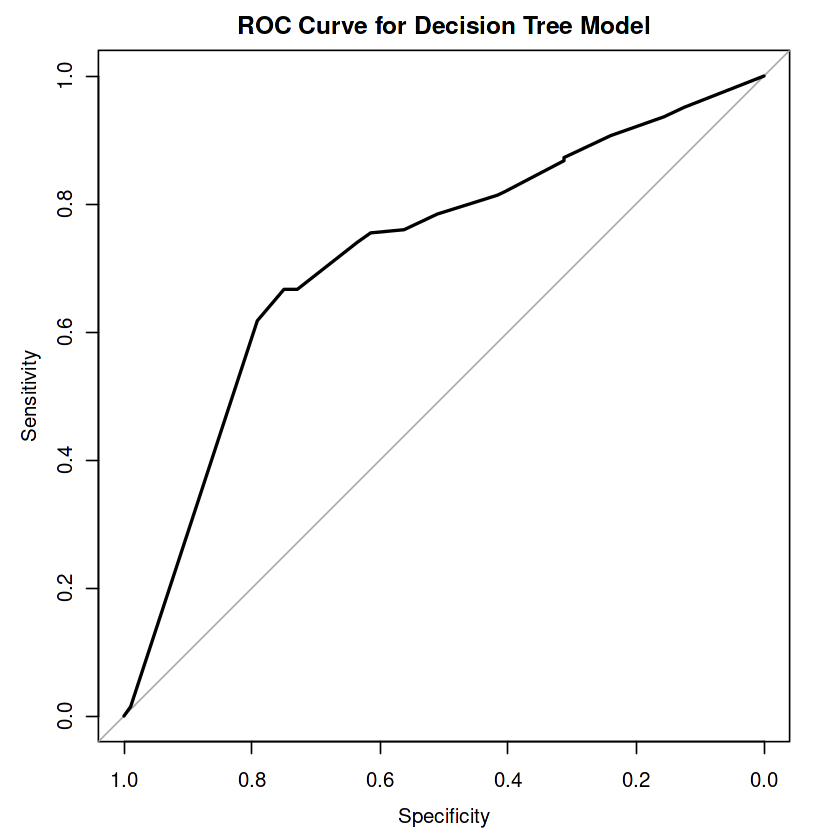

In [34]:

cat("\nDecision Tree Model Evaluation:\n")
cat(sprintf("Accuracy: %.2f\n", tree_accuracy))
cat(sprintf("Precision: %.2f\n", tree_precision))
cat(sprintf("Recall: %.2f\n", tree_recall))
cat(sprintf("F1 Score: %.2f\n", tree_f1))
cat(sprintf("AUC Score: %.2f\n", tree_auc))

plot(tree_roc, main = "ROC Curve for Decision Tree Model")

<h4> Evaluaion of the Decision Tree Model </h4>

* **Accuracy:** The decision tree model has an accuracy of 0.69, which means that it correctly predicted the credit risk of 69% of the borrowers in the test dataset.

* **Precision:** The precision of the Decision Tree model is 0.51, which means that out of all the borrowers that the model predicted as good credit risks, 51% of them are actually good credit risks.

* **Recall:** The recall of the Decision Tree model is 0.41, which means that out of all the actual good credit risks in the test dataset, the model correctly identified 41% of them.

* **F1 Score:** The F1 score of the Decision Tree model is 0.45.

* **AUC Score:** The AUC score of the decision tree model is 0.72, indicating that it is able to distinguish between good and bad credit risks with 72% accuracy.

<h3> Comparison of the Models </h3>

The results of the evaluation show that the logistic regression model outperformed the decision tree model in classifying good and bad credit customers.

The logistic regression model achieved an accuracy of 0.76, indicating that it correctly classified 76% of the customers. In comparison, the decision tree model achieved an accuracy of 0.69, indicating that it correctly classified 69% of the customers.

The precision of the logistic regression model was 0.65, indicating that 65% of the customers classified as good credit customers were actually good. The decision tree model had a precision of 0.51, indicating that only 51% of the customers classified as good credit customers were actually good.

The recall of the logistic regression model was 0.51, indicating that it correctly identified 51% of the good credit customers. The recall of the decision tree model was lower at 0.41, indicating that it missed identifying a significant number of the good credit customers.

The F1 score, which is a weighted average of precision and recall, was higher for the logistic regression model at 0.57, indicating that it performed better in identifying both good and bad credit customers. The decision tree model had an F1 score of 0.45, indicating that it did not perform as well as the logistic regression model in identifying both types of customers.

Finally, the AUC score of the logistic regression model was 0.77, indicating that it had good predictive power in distinguishing between good and bad credit customers. The AUC score of the decision tree model was 0.72, indicating that it also had some predictive power but not as much as the logistic regression model.

In conclusion, based on the evaluation of the models, the logistic regression model is the recommended algorithm for classifying credit customers as good or bad in this dataset. It achieved better performance in terms of accuracy, precision, recall, F1 score, and AUC score compared to the decision tree model.